Dipta roy

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing 
from nltk.corpus import stopwords
import re # https://docs.python.org/3/library/re.html

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 100)
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dipta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import numpy as np
import pandas as pd

x = pd.read_csv('data_reviews/x_train.csv')
y = pd.read_csv('data_reviews/y_train.csv')

# tr_text_list = x['text'].values.tolist()
# for text in tr_text_list:
#     print(text)

df = pd.concat([x,y], axis=1)

In [14]:
x.shape

(2400, 2)

In [15]:
df.shape

(2400, 3)

In [16]:
df.isna().sum()

website_name             0
text                     0
is_positive_sentiment    0
dtype: int64

In [17]:
# Simplest basic tokenizing and counting:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
x_vect = count_vectorizer.fit_transform(x['text'])
# print("Number of features: ", len(x.toarray()[0]))
# print(count_vectorizer.get_feature_names())
# print(x.toarray())
pd.DataFrame(x_vect.toarray(), columns=count_vectorizer.get_feature_names())

00  10  100  11  12  13  15  15g  15pm  17  18  18th  1928  1948  1971  \
0      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
1      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
2      0   0    0   0   0   1   0    0     0   0   0     0     0     0     0   
3      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
4      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
5      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
6      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
7      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
8      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
9      0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
10     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
11     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
12     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
13     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
14     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
15     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
16     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
17     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
18     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
19     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
20     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
21     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
22     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
23     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
24     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
25     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
26     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
27     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
28     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
29     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
30     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
31     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
32     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
33     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
34     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
35     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
36     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
37     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
38     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
39     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
40     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
41     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
42     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
43     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
44     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
45     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
46     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
47     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
48     0   0    0   0   0   0   0    0     0   0   0     0     0     0     0   
49    

## Baseline using count vectorization and Linear Regression without any data prep

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
X_train.columns

Index(['website_name', 'text'], dtype='object')

In [8]:
y_test

is_positive_sentiment
2037                      1
1978                      0
855                       0
1719                      0
2019                      1
...                     ...
30                        0
1171                      0
1996                      0
746                       1
1584                      1

[792 rows x 1 columns]

In [9]:
train_vectors = count_vectorizer.fit_transform(X_train["text"])
# test_vectors = count_vectorizer.transform(y_test["text"])

In [10]:
test_vectors = count_vectorizer.transform(X_test["text"])

In [11]:
clf = linear_model.RidgeClassifier()

In [12]:
scores = model_selection.cross_val_score(clf, train_vectors, y_train["is_positive_sentiment"], cv=3, scoring="f1")
scores

array([0.76748582, 0.75614367, 0.81343284])

In [13]:
train_vectors = count_vectorizer.fit_transform(x["text"])
# test_vectors = count_vectorizer.transform(y_test["text"])

In [14]:
clf.fit(train_vectors, y["is_positive_sentiment"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [15]:
sub = pd.read_csv("data_reviews/x_test.csv")

In [16]:
sub

website_name                                               text
0           imdb  Technically, the film is well made with impres...
1           yelp  !....THE OWNERS REALLY REALLY need to quit bei...
2         amazon                              what a disappointment
3           imdb          The movie is terribly boring in places.  
4           imdb  One of the best mexican movies ever!, and one ...
..           ...                                                ...
595         yelp    This is a great restaurant at the Mandalay Bay.
596         yelp  I could care less... The interior is just beau...
597         imdb  The only consistent thread holding the series ...
598         yelp  My side Greek salad with the Greek dressing wa...
599         yelp  However, my recent experience at this particul...

[600 rows x 2 columns]

In [17]:
sub_vec = count_vectorizer.transform(sub['text'])

In [18]:
yproba1_test = clf.predict(sub_vec)
np.savetxt('yproba1_test.txt', yproba1_test)

## Data Preprocessing

[Text(0.5, 1.0, 'Class Balance')]

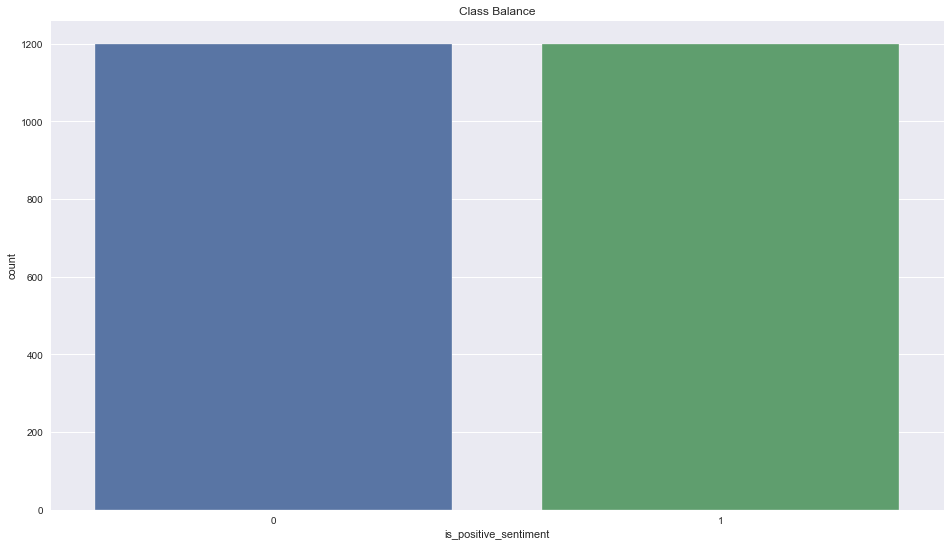

In [19]:
plt.figure(figsize = (16, 9))
sns.set_style("darkgrid")  #checked to see visual of balance between True & Fake articles
sns.countplot(y.is_positive_sentiment).set(title = "Class Balance")

In [44]:
df.isna().sum()

website_name             2400
text                     2400
is_positive_sentiment    2400
dtype: int64

### BAG OF WORDS

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
count_vectorizer = CountVectorizer()
x = count_vectorizer.fit_transform(x.text)
print("Features: ", count_vectorizer.get_feature_names())

analyze = count_vectorizer.build_analyzer()
print([analyze(s) for s in x.text])

Features:  ['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1948', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2007', '20th', '2160', '24', '25', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accomodate', 'accompanied', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', 'ackerman', 'acknowledged', 'act', 'acted', 'acting', 'action', 'actions', 'activate', 'actor', 'actors', 'actress', 'actresses', 'actual', 

AttributeError: text not found

In [10]:
import re, string

In [11]:
re.sub(r"[^0-9\-]", " ", x.text).lower().split()

AttributeError: text not found

In [20]:
from nltk.stem.porter import PorterStemmer

In [17]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def stop_stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()
    
    # remove stops using nltk
    #
    # NOTE: for demo purposes only! You may well find 
    # that the nltk version of 'english' has issues similar
    # to the version found in sklearn; you may want to use
    # your own custom list of stop-words instead
    stops = stopwords.words('english')
    words = [w for w in words if w not in stops]
    
    # stem the remaining words after removing stops; 
    # what happens if we do this *before* removing stops?
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    
    return words

count_vectorizer = CountVectorizer(tokenizer=stop_stemming_tokenizer)
x_count = count_vectorizer.fit_transform(x.text)
features = count_vectorizer.get_feature_names()
print("Number of features: ", len(features))
print(features)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dipta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Number of features:  3404
['abandon', 'abhor', 'abil', 'abl', 'abound', 'abroad', 'absolut', 'absolutel', 'absolutley', 'abstrus', 'abysm', 'ac', 'academi', 'accent', 'accept', 'access', 'accessoryon', 'accid', 'accident', 'acclaim', 'accolad', 'accomod', 'accompani', 'accur', 'accus', 'ach', 'achiev', 'achil', 'ackerman', 'acknowledg', 'act', 'action', 'activ', 'actor', 'actress', 'actual', 'ad', 'adapt', 'add', 'addit', 'adhes', 'admin', 'admit', 'ador', 'adrift', 'adventur', 'advertis', 'advis', 'aerial', 'aesthet', 'affect', 'affleck', 'afford', 'afraid', 'africa', 'afternoon', 'age', 'ago', 'agre', 'ahead', 'aimless', 'air', 'airlin', 'akin', 'ala', 'alarm', 'albondiga', 'alexand', 'alik', 'allot', 'allow', 'almond', 'almost', 'alon', 'along', 'alongsid', 'alot', 'alreadi', 'also', 'although', 'aluminum', 'alway', 'amateurish', 'amaz', 'amazingli', 'amazon', 'ambianc', 'ambienc', 'america', 'american', 'among', 'amount', 'amp', 'ampl', 'amus', 'anatomist', 'andddd', 'angel', 'ange

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# By setting use_idf=False (default is True), we don't pay attention 
# to the amount that each word occurs in the overall set of documents.
tf_vectorizer = TfidfVectorizer(tokenizer=stop_stemming_tokenizer, use_idf=False)
x = tf_vectorizer.fit_transform(x.text)
pd.DataFrame(x.toarray(), columns=tf_vectorizer.get_feature_names())

abandon  abhor  abil  abl  abound  abroad  absolut  absolutel  \
0         0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
1         0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
2         0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
3         0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
4         0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
...       ...    ...   ...  ...     ...     ...      ...        ...   
2395      0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
2396      0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
2397      0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
2398      0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   
2399      0.0    0.0   0.0  0.0     0.0     0.0      0.0        0.0   

      absolutley  abstrus  ...  youtub  yucki  yukon  yum  yummi  yun    z  \
0            0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
1            0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
2            0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
3            0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
4            0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
...          ...      ...  ...     ...    ...    ...  ...    ...  ...  ...   
2395         0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
2396         0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
2397         0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
2398         0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   
2399         0.0      0.0  ...     0.0    0.0    0.0  0.0    0.0  0.0  0.0   

      zero  zillion  zombi  
0      0.0      0.0    0.0  
1      0.0      0.0    0.0  
2      0.0      0.0    0.0  
3      0.0      0.0    0.0  
4      0.0      0.0    0.0  
...    ...      ...    ...  
2395   0.0      0.0    0.0  
2396   0.0      0.0    0.0  
2397   0.0      0.0    0.0  
2398   0.0      0.0    0.0  
2399   0.0      0.0    0.0  

[2400 rows x 3404 columns]

In [21]:
x

<2400x3404 sparse matrix of type '<class 'numpy.float64'>'
	with 14190 stored elements in Compressed Sparse Row format>

In [ ]:
def tokenizer(str_input):
    words = re.sub(r"[^A-Za-z]", " ", str_input).lower().split()
    
    # remove stops using nltk
    #
    # NOTE: for demo purposes only! You may well find 
    # that the nltk version of 'english' has issues similar
    # to the version found in sklearn; you may want to use
    # your own custom list of stop-words instead
    stops = stopwords.words('english')
    words = [w for w in words if w not in stops]
    
    # stem the remaining words after removing stops; 
    # what happens if we do this *before* removing stops?
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    
    return words

In [36]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip().lower())
    return words
corpus = get_corpus(x.text)
corpus[:5]

['oh', 'and', 'i', 'forgot', 'to']

In [42]:
from collections import Counter  #checked to see how many times the top 10 most frequent words were in the articles
counter = Counter(corpus)
most_common = counter.most_common(200)
most_common = dict(most_common)
most_common.keys()

dict_keys(['the', 'and', 'a', 'i', 'is', 'to', 'of', 'this', 'was', 'it', 'in', 'for', 'not', 'that', 'with', 'my', 'very', 'on', 'you', 'but', 'have', 'are', 'good', 'so', 'as', 'great', 'be', 'movie', 'at', 'had', 'phone', 'one', 'all', 'like', 'were', 'an', 'just', 'film', 'if', 'we', "it's", 'they', 'there', 'really', 'from', 'place', 'would', 'food', 'has', 'about', 'out', 'it.', 'your', 'even', 'only', 'or', "don't", 'time', 'by', '-', 'no', 'service', 'will', 'ever', 'bad', 'than', 'best', 'also', 'when', 'what', 'he', 'go', 'because', 'can', 'love', 'which', 'some', 'up', 'more', "i'm", "i've", 'get', 'his', 'could', 'recommend', 'been', 'how', 'who', 'our', 'works', 'make', 'do', 'better', 'after', 'quality', 'made', 'excellent', 'here', 'any', "didn't", 'well', 'their', 'me', 'most', 'much', 'first', 'think', 'did', 'back', 'other', 'sound', 'its', 'never', 'see', 'still', 'nice', 'pretty', 'every', 'little', 'battery', 'work', 'now', 'way', 'being', 'use', 'too', 'phone.', '

In [44]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range = (g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [45]:
get_top_text_ngrams(x.text, 6, 2)  #testing out function

[('of the', 135),
 ('and the', 91),
 ('in the', 91),
 ('it was', 79),
 ('it is', 75),
 ('this is', 74)]

## Now taking off the stop words because it looks like there are a lot of stop words 

In [1]:
# stop = set(stopwords.words('english'))
# punctuation = list(string.punctuation)
# stop.update(punctuation)

NameError: name 'stopwords' is not defined

In [43]:
stop = ['the', 'and', 'a', 'i', 'is', 'to', 'of', 'this', 'was', 'it', 'in', 'for', 'that', 'with', 'my', 'very', 'on', 'you', 'but', 'have', 'are',  'an', 'just'
       ,'if', 'we', "it's", 'they', 'there', 'really', 'from','has', 'about', 'your', 'even', 'only', 'or', 'when', 'what', 'he', 'go', 'because'
       ,'which', 'some', 'up', 'how', 'who', 'our', 'after','their', 'me', 'did', 'its', 'see', 'still',  'battery','got', 'am',  'does', 'them', 'two', 'going'
       , '&', 'look', 'plot', 'story']

In [71]:
stop = stopwords.words('english') + punctuation + ["said", "want", "think", "way", "say", "saying", "last week", "also", "show", "like", "much", "come", "would", "video", "even", ]

In [72]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [73]:
x['clean'] = x.text.apply(remove_stopwords)

In [74]:
x

website_name                                               text  \
0          amazon  Oh and I forgot to also mention the weird colo...   
1          amazon                       THAT one didn't work either.   
2          amazon                                 Waste of 13 bucks.   
3          amazon  Product is useless, since it does not have eno...   
4          amazon  None of the three sizes they sent with the hea...   
...           ...                                                ...   
2395         yelp  The sweet potato fries were very good and seas...   
2396         yelp  I could eat their bruschetta all day it is dev...   
2397         yelp                               Ambience is perfect.   
2398         yelp  We ordered the duck rare and it was pink and t...   
2399         yelp       Service was good and the company was better!   

                                                  clean  
0           Oh forgot mention weird color effect phone.  
1                                      one work either.  
2                                       Waste 13 bucks.  
3     Product useless, since enough charging current...  
4              None three sizes sent headset stay ears.  
...                                                 ...  
2395             sweet potato fries good seasoned well.  
2396                   could eat bruschetta day devine.  
2397                                  Ambience perfect.  
2398  ordered duck rare pink tender inside nice char...  
2399                       Service good company better!  

[2400 rows x 3 columns]

In [76]:
get_top_text_ngrams(x.clean, 6, 3)

[('ve ever seen', 4),
 ('give zero stars', 3),
 ('ve ever had', 3),
 ('worth checking out', 3),
 ('going back anytime', 3),
 ('back anytime soon', 3)]

In [77]:
corpus = get_corpus(x.clean)

In [79]:
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'good': 125,
 'movie': 105,
 'phone': 93,
 'one': 92,
 'film': 87,
 'great': 78,
 'place': 74,
 'really': 71,
 'it.': 66,
 'food': 64}